### Multiple Regression


In [19]:
import pandas as pd

In [20]:
import numpy as np

In [21]:
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('mtcars.csv')

In [17]:
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [23]:
df.corrwith(df['mpg'])


mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
dtype: float64

In [11]:
salary = pd.read_csv('Salary_Data.csv')
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [24]:
x = df[['disp','hp','wt']]
y = df['mpg']

In [26]:
x

,disp,hp,wt
0,160.0,110,2.620
1,160.0,110,2.875
2,108.0,93,2.320
3,258.0,110,3.215
4,360.0,175,3.440
5,225.0,105,3.460
6,360.0,245,3.570
7,146.7,62,3.190
8,140.8,95,3.150
9,167.6,123,3.440


### import the class

In [30]:
from sklearn.linear_model import LinearRegression

### creating the object

In [31]:
reg = LinearRegression()

### train the model

In [32]:
reg.fit(x,y)

LinearRegression()

### predict on unseen data

In [38]:
disp = 221
hp = 115
wt = 2.91
reg.predict([[disp,hp,wt]])

C:\Users\Omkar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.25483132])

In [39]:
reg.score(x,y)

0.8268361424946447

### visulize

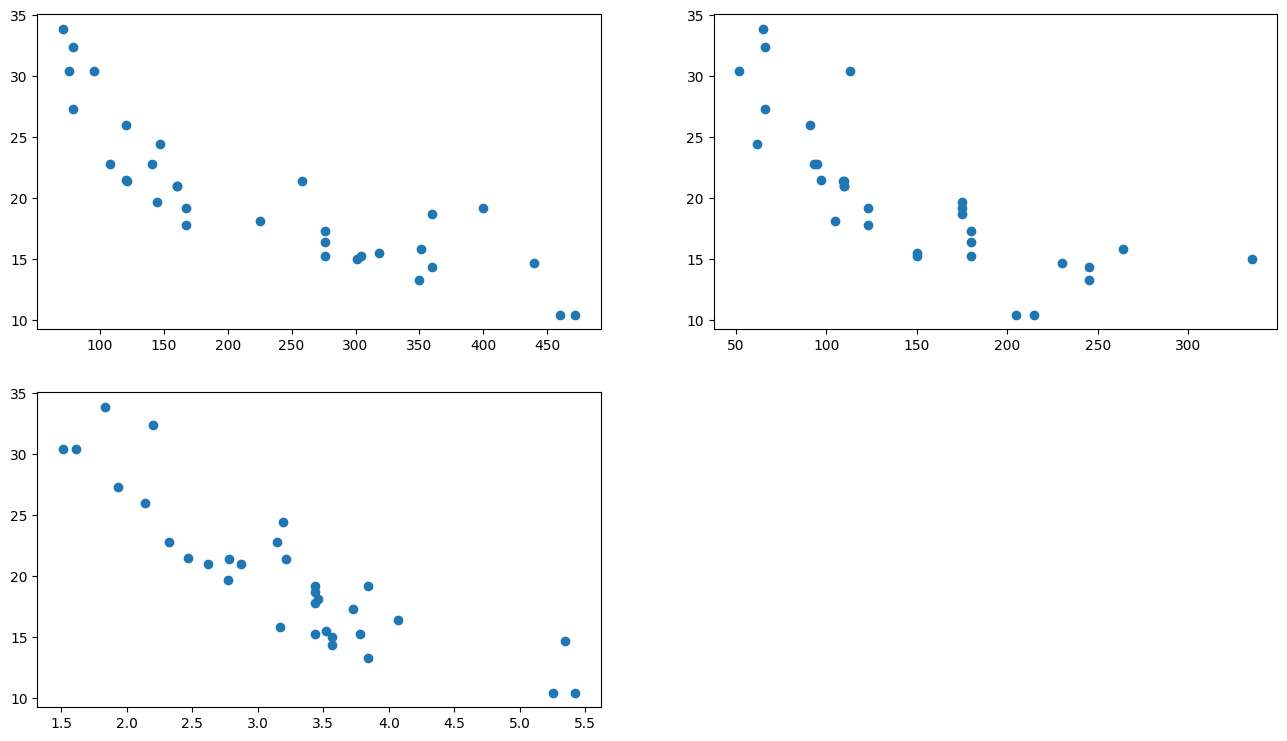

In [41]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
plt.scatter(df['disp'],y)
plt.subplot(2,2,2)
plt.scatter(df['hp'],y)
plt.subplot(2,2,3)
plt.scatter(df['wt'],y)


# Decision tree

### import dataset

In [46]:
df = pd.read_csv("SOCIAL_NETWORK_Ads.csv")

In [47]:
df.shape

(400, 5)

In [48]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### separate input and output variables

In [51]:
x= df[["Age","EstimatedSalary"]]
y = df['Purchased']

In [52]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [53]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

visulize the data

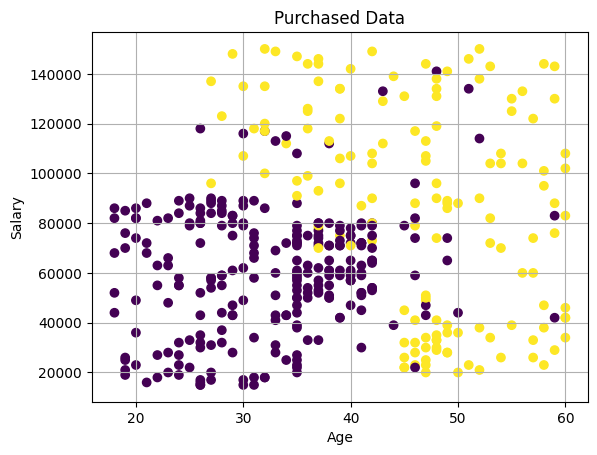

In [57]:
plt.title("Purchased Data")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'],x['EstimatedSalary'],c=y)

In [58]:
from sklearn.tree import DecisionTreeClassifier

### create the object

In [59]:
classifier = DecisionTreeClassifier(random_state=0)

### train the model

In [60]:
classifier.fit(x,y)

DecisionTreeClassifier(random_state=0)

### plot the tree

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

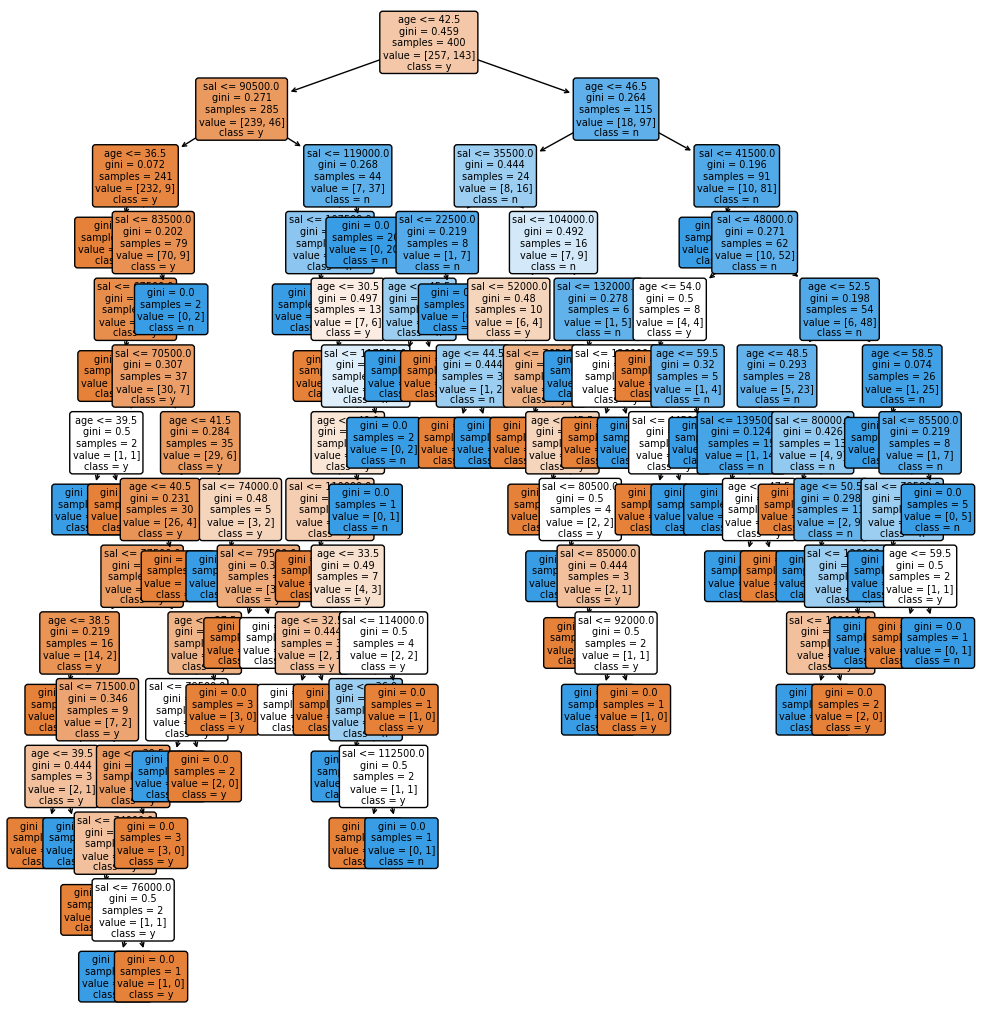

In [67]:
plt.figure(figsize=(12,13))
plot_tree(classifier,fontsize=7,feature_names=['age','sal'],class_names=['y','n'],filled=True,rounded=True);

In [71]:
new = pd.DataFrame({
    'Age':[23,45,54,67],
    'EstimatedSalary':[45000,89000,23000,134000]
,
})

In [72]:
new

,Age,EstimatedSalary
0,23,45000
1,45,89000
2,54,23000
3,67,134000


In [74]:
classifier.predict(new)

array([0, 0, 1, 1], dtype=int64)

### Naive Bayes Classifier

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
classifier = GaussianNB()

In [77]:
classifier.fit(x,y)

GaussianNB()

In [78]:
classifier.predict(new)

array([0, 1, 1, 1], dtype=int64)

### Predict on unseen data

In [79]:
new

,Age,EstimatedSalary
0,23,45000
1,45,89000
2,54,23000
3,67,134000


In [80]:
classifier.predict_proba(new)

array([[9.87869132e-01, 1.21308684e-02],
       [3.50234752e-01, 6.49765248e-01],
       [1.25743407e-01, 8.74256593e-01],
       [1.33563595e-04, 9.99866436e-01]])

In [82]:
classifier.predict([[27,43800]])

C:\Users\Omkar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)